# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [116]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [117]:
car_data=pd.read_csv("CarPrice_Assignment.csv")

In [118]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [119]:
np.where(car_data.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [120]:
car_data.drop(columns='car_ID', inplace= True)

In [121]:
car_data.isnull().any()

symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [122]:
#car_data.drop(columns=['CarName','car_ID'],inplace=True)

In [123]:
car_data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [124]:
car_data.iloc[3,2] = 'audi 100ls'

In [125]:
car_data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [126]:
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [127]:
final_car = pd.get_dummies(car_data,columns=['CarName','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

In [128]:
final_car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
np.random.seed(11111)
msk = np.random.rand(len(final_car)) < 0.72
train_total = final_car[msk]
test_total = final_car[~msk]

In [130]:
print(len(train_total))
print(len(test_total))

141
64


In [131]:
train_total.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,...,0,0,0,0,0,0,0,1,0,0
11,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,0,0,0,0,0,0,0,1,0,0


In [132]:
train_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,98.692199,173.658156,65.875887,53.648227,2546.787234,125.666667,3.324184,3.256809,10.070355,103.702128,...,0.007092,0.028369,0.056738,0.326241,0.021277,0.092199,0.007092,0.453901,0.035461,0.007092
std,6.005665,12.320089,2.188604,2.508204,529.769152,41.733451,0.266123,0.296387,3.868579,38.424275,...,0.084215,0.166616,0.232165,0.470508,0.144819,0.290337,0.084215,0.499645,0.185601,0.084215
min,86.600000,144.600000,61.800000,47.800000,1713.000000,70.000000,2.680000,2.190000,7.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.000000,51.600000,2128.000000,97.000000,3.150000,3.150000,8.500000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.500000,172.400000,65.400000,53.900000,2410.000000,110.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,180.300000,66.600000,55.500000,2952.000000,141.000000,3.580000,3.400000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,115.600000,202.600000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
print(train_total.dtypes)

wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 206, dtype: object


In [134]:
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']

In [135]:
train_label

1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 141, dtype: float64

In [136]:
test_label

0      13495.0
10     16430.0
14     24565.0
15     30760.0
18      5151.0
        ...   
192    13845.0
193    12290.0
194    12940.0
196    15985.0
198    18420.0
Name: price, Length: 64, dtype: float64

In [137]:
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])

In [138]:
train_data.shape

(141, 205)

In [139]:
train_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [140]:
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'CarName_Nissan versa',
 14: 'CarName_alfa-romero Quadrifoglio',
 15: 'CarName_alfa-romero giulia',
 16: 'CarName_alfa-romero stelvio',
 17: 'CarName_audi 100 ls',
 18: 'CarName_audi 100ls',
 19: 'CarName_audi 4000',
 20: 'CarName_audi 5000',
 21: 'CarName_audi 5000s (diesel)',
 22: 'CarName_audi fox',
 23: 'CarName_bmw 320i',
 24: 'CarName_bmw x1',
 25: 'CarName_bmw x3',
 26: 'CarName_bmw x4',
 27: 'CarName_bmw x5',
 28: 'CarName_bmw z4',
 29: 'CarName_buick century',
 30: 'CarName_buick century luxus (sw)',
 31: 'CarName_buick century special',
 32: 'CarName_buick electra 225 custom',
 33: 'CarName_buick opel isuzu deluxe',
 34: 'CarName_buick regal sport coupe (turbo)',
 35: 'CarName_buick skyhawk',
 36: 'CarName_buick skylark',
 37: 'CarName_chevrolet im

In [141]:
mean = train_data.iloc[:,0:13].mean(axis=0) 
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std

In [142]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label

In [143]:
print(mean_label)

13379.132390070921


In [144]:
test_label

0      0.014148
10     0.372534
14     1.365880
15     2.122337
18    -1.004718
         ...   
192    0.056886
193   -0.132991
194   -0.053621
196    0.318196
198    0.615529
Name: price, Length: 64, dtype: float64

In [145]:
train_data.shape

(141, 205)

In [146]:
test = np.array(test_data.iloc[:])

In [147]:
train = np.array(train_data.iloc[:])

In [148]:
test_l= np.array(test_label.astype('float32'))

In [149]:
train_l= np.array(train_label.astype('float32'))

In [150]:
train.shape

(141, 205)

In [151]:
from keras import models
from keras import layers

def build_model(fun):
    model = models.Sequential()
    model.add(layers.Dense(10, activation=fun, input_shape=(train.shape[1],)))
    model.add(layers.Dense(8, activation=fun))
    model.add(layers.Dense(6, activation=fun))

    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


In [152]:
build_model('tanh').summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 10)                2060      
_________________________________________________________________
dense_121 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_122 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 7         
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [153]:
build_model('relu').summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 10)                2060      
_________________________________________________________________
dense_125 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_126 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 7         
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [154]:
build_model('tanh').summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 10)                2060      
_________________________________________________________________
dense_129 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_130 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 7         
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [155]:
import numpy as np
k=4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_rl = []

In [156]:
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model('relu')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_rl.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [157]:
train.shape

(141, 205)

In [158]:
import numpy as np
k=4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model('tanh')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_tanh.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [159]:
all_scores_rl

[0.29717037081718445,
 0.31563591957092285,
 0.39146482944488525,
 0.3875195384025574]

In [160]:
all_scores_tanh

[0.30602017045021057,
 0.23832876980304718,
 0.3629644811153412,
 0.3990229666233063]

In [161]:
model_tanh = build_model('tanh')
history=model_tanh.fit(train, train_l,epochs= 80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test, test_l)

2/2 [==============================] - 0s 0s/step - loss: 0.0957 - mae: 0.2304


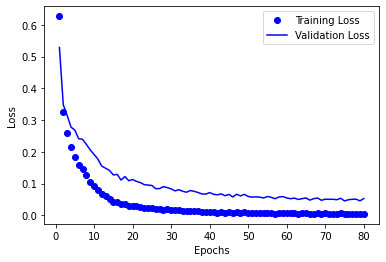

In [162]:
import matplotlib.pyplot as plt
loss=history.history["loss"]
mae=history.history["mae"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, mae, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [163]:
model_relu = build_model('relu')
model_relu.fit(train, train_l,epochs= 80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test, test_l)

2/2 [==============================] - 0s 5ms/step - loss: 0.1202 - mae: 0.2697


In [164]:
x_tanh = model_tanh.predict(test[5].reshape(1,test.shape[1]))

In [165]:
x_tanh * std_label + mean_label

array([[6804.696]], dtype=float32)

In [166]:
test_l[5]* std_label + mean_label

7609.000199706914

In [167]:
x_relu = model_relu.predict(test[5].reshape(1,test.shape[1]))

In [168]:
x_relu * std_label + mean_label

array([[7636.4004]], dtype=float32)